In [153]:
## all imports up here, rerun this block when adding
import pandas as pd
import numpy as np
import cv2 as cv
import sys
sys.path.insert(0, '../Synthetic Group Creation/')
from groups_generators import GroupsGenerator
sys.path.insert(0, '../Synthetic Group Creation/')
import config as cfg  


In [154]:
ratings_df = pd.read_csv("../../Datasets/XWines_Slim_1K_wines_150K_ratings/XWines_Slim_150K_ratings.csv", low_memory=False, encoding="utf-8", memory_map=True)
wines_df = pd.read_csv("../../Datasets/XWines_Slim_1K_wines_150K_ratings/XWines_Slim_1K_wines.csv", low_memory=False, encoding="utf-8", memory_map=True)

In [155]:
#wines_df = pd.read_csv("../../Datasets/All-XWines_Full_100K_wines_21M_ratings/XWines_Full_100K_wines.csv", low_memory=False, encoding="utf-8", memory_map=True)
#ratings_df = pd.read_csv("../../Datasets/All-XWines_Full_100K_wines_21M_ratings/XWines_Full_21M_ratings.csv", low_memory=False, encoding="utf-8", memory_map=True)

In [156]:
ratings_df.head()

,RatingID,UserID,WineID,Vintage,Rating,Date
0,143,1356810,103471,1950,4.5,2021-11-02 20:52:59
1,199,1173759,111415,1951,5.0,2015-08-20 17:46:26
2,348,1164877,111395,1952,5.0,2020-11-13 05:40:26
3,374,1207665,111433,1953,5.0,2017-05-05 06:44:13
4,834,1075841,111431,1955,5.0,2016-09-14 20:18:38


In [157]:
wines_df.shape

(1007, 17)

In [158]:
wines_df.head()

,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages
0,100001,Espumante Moscatel,Sparkling,Varietal/100%,['Muscat/Moscato'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,http://www.vinicolaperini.com.br,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."
1,100002,Ancellotta,Red,Varietal/100%,['Ancellotta'],"['Beef', 'Barbecue', 'Codfish', 'Pasta', 'Pizz...",12.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,http://www.vinicolaperini.com.br,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 200..."
2,100003,Cabernet Sauvignon,Red,Varietal/100%,['Cabernet Sauvignon'],"['Beef', 'Lamb', 'Poultry']",12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,https://www.emporiocastellamare.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
3,100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,"['Cabernet Sauvignon', 'Merlot']","['Beef', 'Lamb', 'Game Meat', 'Poultry']",11.0,Full-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
4,100007,Do Lugar Moscatel Espumantes,Sparkling,Varietal/100%,['Muscat/Moscato Bianco'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,BR,Brazil,1001,Serra Gaúcha,10012,Dal Pizzol,http://www.dalpizzol.com.br,"[2018, 2017, 2016, 2015, 2014, 2013, 2012, 201..."


**Group settings**

In [159]:
group_sizes_to_create = cfg.group_sizes_to_create
group_similarity_to_create = cfg.group_similarity_to_create
group_number = cfg.group_number

# Similarity evaluation

In [160]:
# Counts the amount of ratings per user
ratings_per_user = ratings_df.groupby('UserID').size()

# Calculate the average number of ratings per user
average_number_of_rating = ratings_per_user.mean()

#Round Value
rounded_average_number_of_rating = round(average_number_of_rating)
print(rounded_average_number_of_rating)

14


In [161]:
# Count the number of ratings for each user
user_counts = ratings_df['UserID'].value_counts()

# Filter users who have at least the specified number of ratings
filtered_users = user_counts[user_counts <= rounded_average_number_of_rating].index

# Filter the DataFrame to keep only these users
ratings_df = ratings_df[ratings_df['UserID'].isin(filtered_users)]
print(ratings_df)

        RatingID   UserID  WineID Vintage  Rating                 Date
3            374  1207665  111433    1953     5.0  2017-05-05 06:44:13
4            834  1075841  111431    1955     5.0  2016-09-14 20:18:38
5            876  1211463  111395    1955     5.0  2021-12-02 23:12:49
6           1005  1076348  111433    1955     4.5  2021-06-19 19:53:56
8           1029  1225931  111431    1955     5.0  2017-04-24 01:41:52
...          ...      ...     ...     ...     ...                  ...
149993  21013409  1086949  111484    N.V.     4.5  2019-04-14 17:31:49
149994  21013430  1026866  111479    N.V.     4.0  2014-11-22 15:00:48
149995  21013438  1000052  111468    N.V.     4.5  2021-12-22 21:03:51
149997  21013494  1218581  113690    N.V.     3.5  2019-04-14 17:45:08
149999  21013509  1059173  111479    N.V.     5.0  2019-09-08 15:42:28

[70480 rows x 6 columns]


In [162]:
# computing similarity between each pair of users
user_matrix = ratings_df.pivot_table(columns='WineID', index='UserID', values='Rating')
user_id_set = set(ratings_df['UserID'])
user_id_indexes = user_matrix.index.values
user_matrix = user_matrix.fillna(0)
numpy_array = user_matrix.to_numpy()
sim_matrix = np.corrcoef(numpy_array)

## Visualization of the similarity distribution

Text(0.5, 0, "Pearson's Correlation Coeficient")

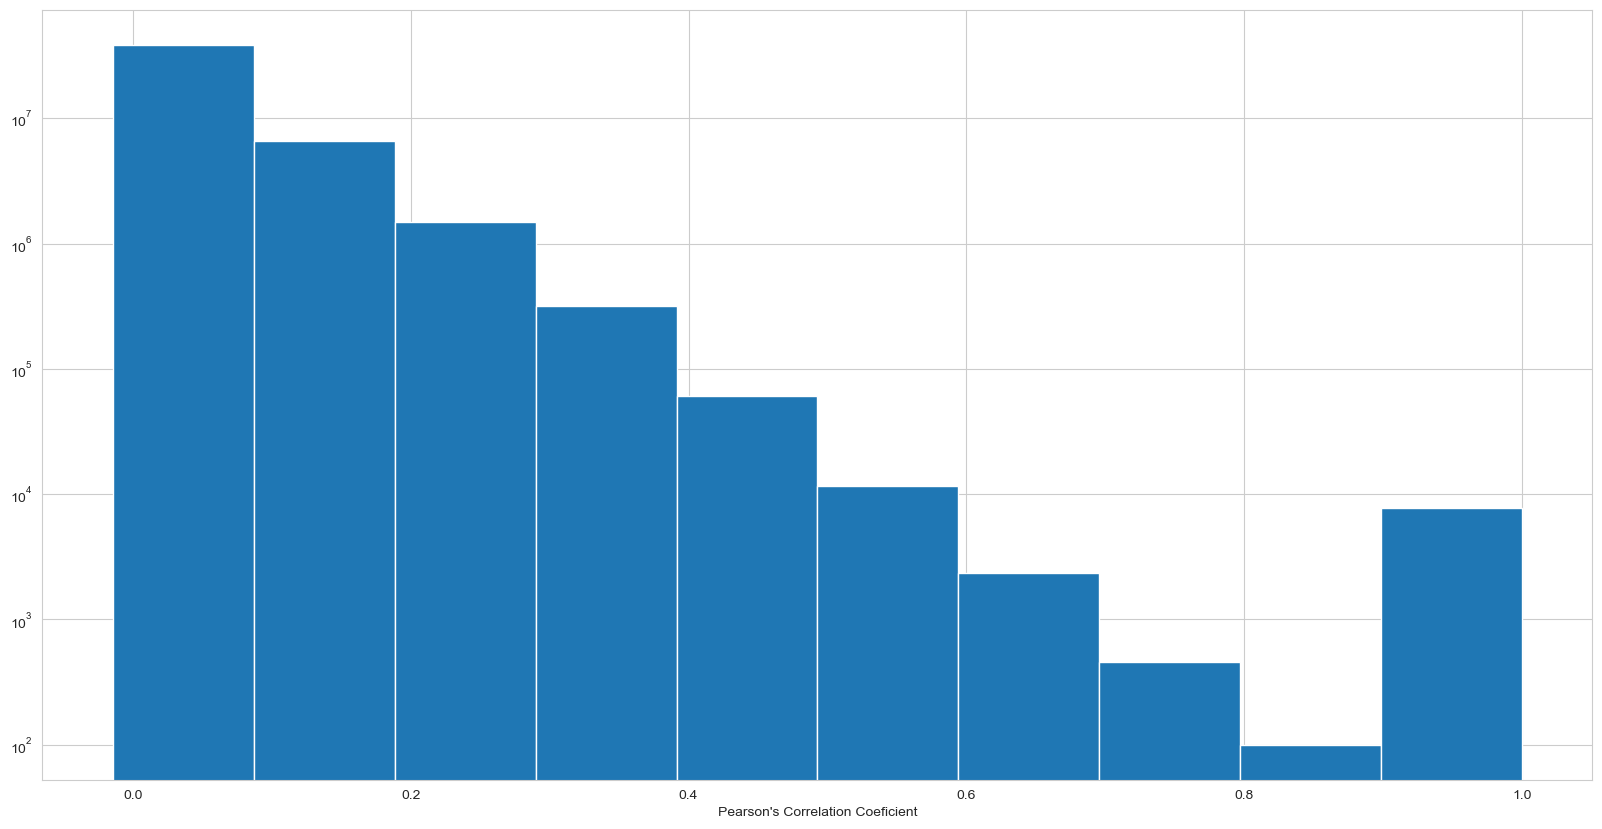

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(sim_matrix.flatten())
plt.yscale("log")
plt.xlabel("Pearson's Correlation Coeficient")

## Group creation

In [164]:
from groups_generators import GroupsGenerator
user_id_set = sorted(user_id_set)
group_list = list()

for group_type in group_similarity_to_create:
    grpGenerator = GroupsGenerator.getGroupsGenerator(group_type)
    current_list = grpGenerator.generateGroups(user_id_indexes, user_id_set, sim_matrix, group_sizes_to_create, group_number)
    group_list = group_list + current_list

group_dict = dict()
for group_id, group in zip(range(len(group_list)), group_list):
    group_dict[group_id] = group

20
40
60
20
40
60
20
40
60
20
40
60


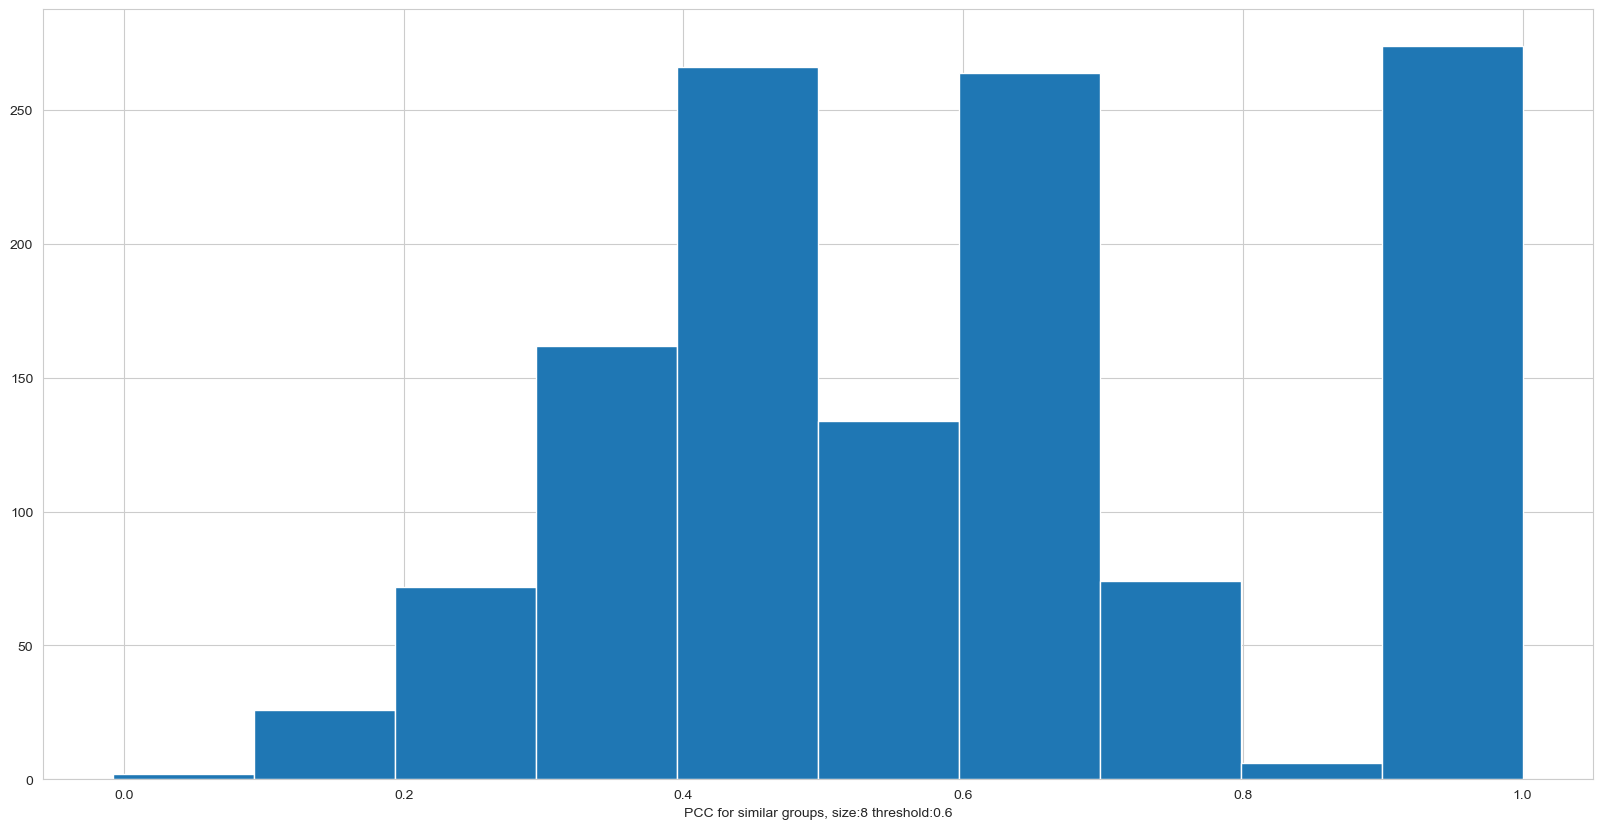

In [165]:
group_similarity = "similar"
group_size = 8
histogram_list = []
for gid in group_dict.keys():
    g = group_dict[gid]
    if g["group_similarity"] == group_similarity and g["group_size"] == group_size:
        member_index = [user_id_indexes.tolist().index(member) for member in g["group_members"]]
        s = sim_matrix[member_index]
        histogram_list.extend(s[:,member_index].flatten().tolist())

        
plt.hist(histogram_list)
#plt.yscale("log")
plt.xlabel("PCC for "+group_similarity+" groups, size:"+str(group_size)+" threshold:"+str(cfg.similar_threshold))    
plt.savefig("pcc_"+group_similarity+"_"+str(group_size)+"_"+str(int(cfg.similar_threshold*10))+".png", dpi=300)

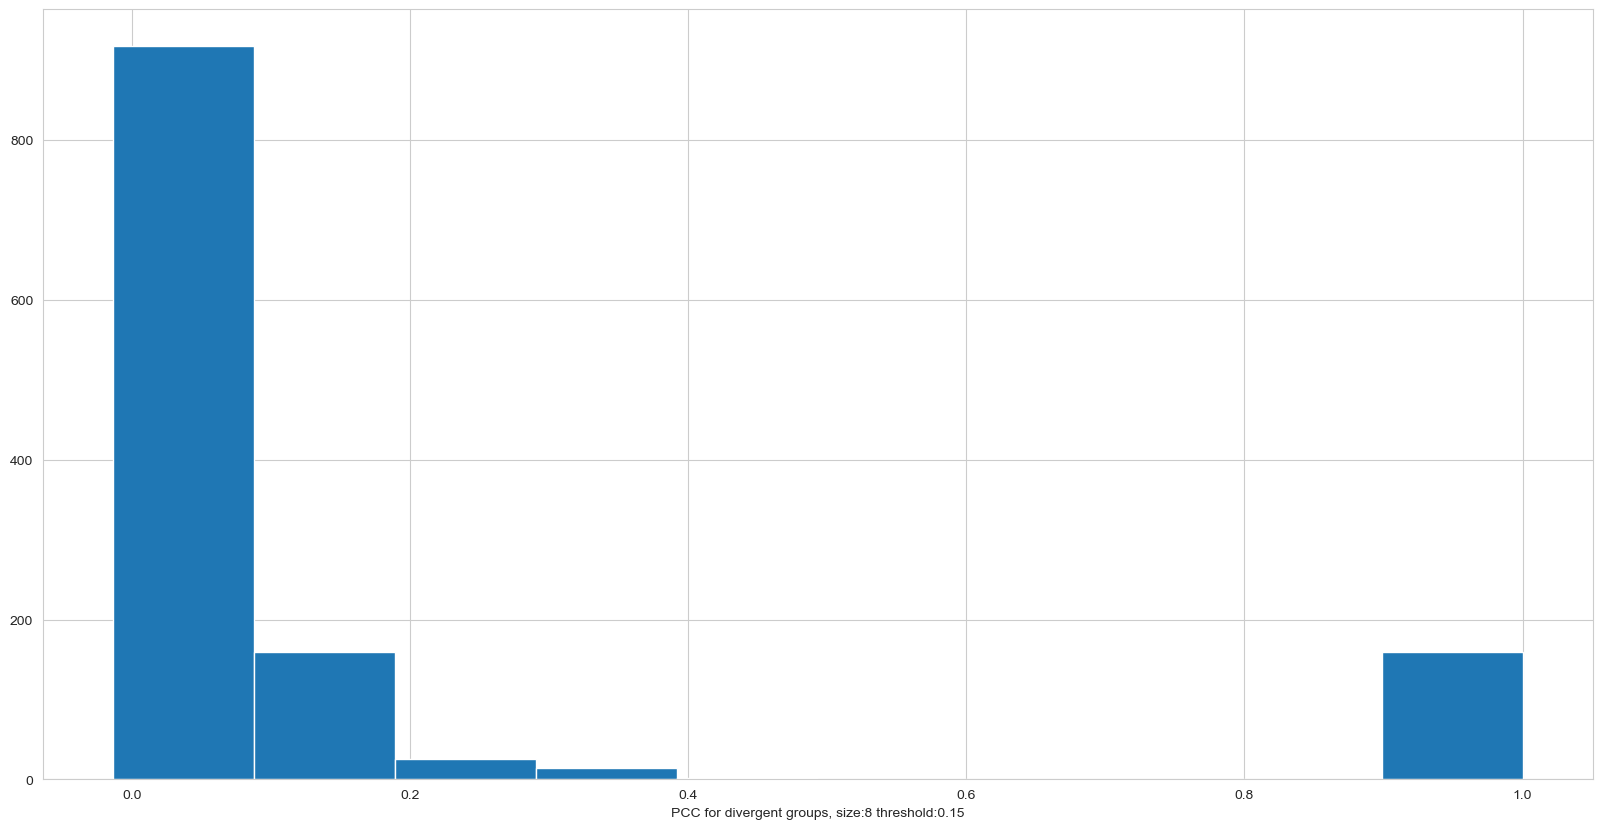

In [166]:
group_similarity = "divergent"
group_size = 8
histogram_list = []
for gid in group_dict.keys():
    g = group_dict[gid]
    if g["group_similarity"] == group_similarity and g["group_size"] == group_size:
        member_index = [user_id_indexes.tolist().index(member) for member in g["group_members"]]
        s = sim_matrix[member_index]
        histogram_list.extend(s[:,member_index].flatten().tolist())

        
plt.hist(histogram_list)
#plt.yscale("log")
plt.xlabel("PCC for "+group_similarity+" groups, size:"+str(group_size)+" threshold:"+str(cfg.dissimilar_threshold))    
plt.savefig("pcc_"+group_similarity+"_"+str(group_size)+"_"+str(int(cfg.dissimilar_threshold*10))+".png", dpi=300)

### Comparing groups internal average similarity between the different types and sizes 

In [167]:
groups_list = list()
for group in group_dict:
    groups_list.append(
        {
            'group_id': group,
            'group_size': group_dict[group]['group_size'],
            'group_similarity': group_dict[group]['group_similarity'],
            'group_members': group_dict[group]['group_members'],
            'avg_similarity': group_dict[group]['avg_similarity']
        }
    )

groups_df = pd.DataFrame.from_records(groups_list)
display(groups_df.head(10))

,group_id,group_size,group_similarity,group_members,avg_similarity
0,0,2,random,"[1903324, 1099537]",-0.010109
1,1,2,random,"[1000082, 1224980]",-0.009630
2,2,2,random,"[1235953, 1934270]",0.064019
3,3,2,random,"[1100584, 1242678]",-0.010472
4,4,2,random,"[1280803, 1557407]",0.107985
5,5,2,random,"[1359739, 1012760]",-0.012239
6,6,2,random,"[1214909, 1022524]",-0.009593
7,7,2,random,"[1132566, 1137721]",-0.010283
8,8,2,random,"[1763967, 1204227]",-0.010742
9,9,2,random,"[1139703, 1777497]",-0.012083


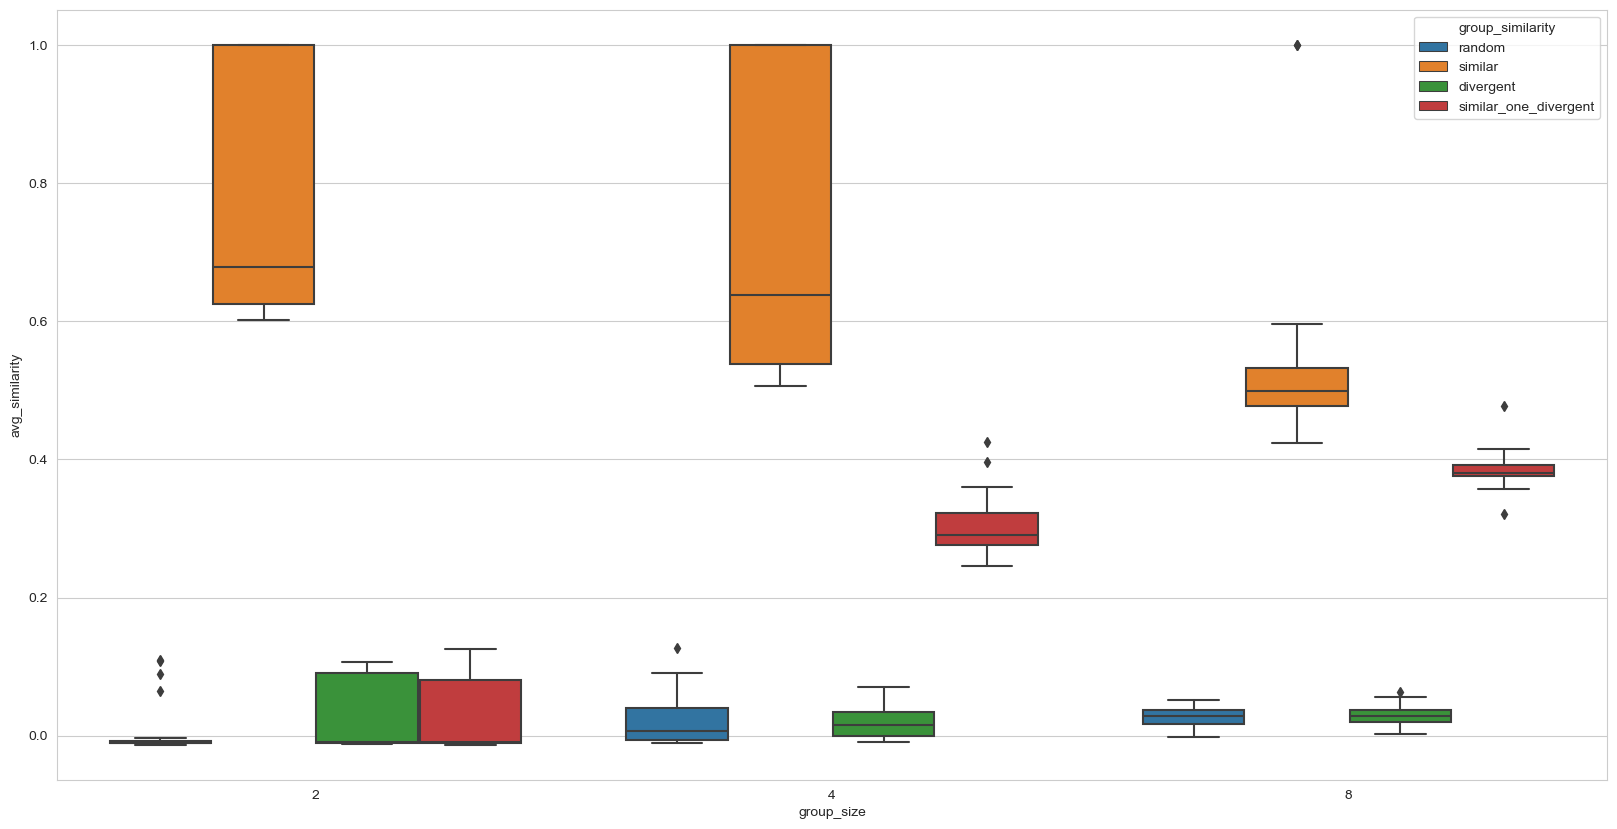

In [168]:
import seaborn as sns


plt.rcParams["figure.figsize"] = (20,10)
sns.boxplot(x = groups_df['group_size'],
            y = groups_df['avg_similarity'],
            hue = groups_df['group_similarity'])
import matplotlib.pyplot as plt

# Train/Test split

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

**Read in Data again for clean start**

In [170]:
ratings_df = pd.read_csv("../../Datasets/XWines_Slim_1K_wines_150K_ratings/XWines_Slim_150K_ratings.csv", low_memory=False, encoding="utf-8", memory_map=True)
wines_df = pd.read_csv("../../Datasets/XWines_Slim_1K_wines_150K_ratings/XWines_Slim_1K_wines.csv", low_memory=False, encoding="utf-8", memory_map=True)

In [171]:
ratings_df.head()

,RatingID,UserID,WineID,Vintage,Rating,Date
0,143,1356810,103471,1950,4.5,2021-11-02 20:52:59
1,199,1173759,111415,1951,5.0,2015-08-20 17:46:26
2,348,1164877,111395,1952,5.0,2020-11-13 05:40:26
3,374,1207665,111433,1953,5.0,2017-05-05 06:44:13
4,834,1075841,111431,1955,5.0,2016-09-14 20:18:38


**To ensure that the distribution of users in the training and test sets is similar, we use stratified sampling. This means that the proportion of users in each group (similar or dissimilar) is preserved in both the training and test sets.**

In [172]:
#items = set(ratings_df["WineID"].tolist())
#users = set(ratings_df["UserID"].tolist())

#train_df, test_df = train_test_split(filtered_ratings_df, test_size=0.2)

#display(train_df.shape)
#display(test_df.shape)

In [173]:
# Handle the case where a UserID might have too few ratings by removing such users. This ensures the stratificaiton works
# and the test set can make predictions for all users that the training set has seen.
user_counts = ratings_df["UserID"].value_counts()
filtered_ratings_df = ratings_df[ratings_df["UserID"].isin(user_counts[user_counts >= 2].index)]

items = set(ratings_df["WineID"].tolist())
users = set(ratings_df["UserID"].tolist())
display(len(items))
display(len(users))

#filtered ratings
items_filtered = set(filtered_ratings_df["WineID"].tolist())
users_filtered = set(filtered_ratings_df["UserID"].tolist())
display(len(items_filtered))
display(len(users_filtered))


train_df, test_df = train_test_split(filtered_ratings_df, test_size=0.2, stratify=filtered_ratings_df["UserID"])

display(train_df.shape)
display(test_df.shape)

1007

10561

1003

10314

(119802, 6)

(29951, 6)

**The next step is not quiet necessary for larger dataset. However for the XWines_Slim_1K_wines_150K_ratings dataset, we need to remove the missing items from the test set and include them to the train set to prevent a cold start problem**

In [174]:
#check of user coverage
train_users = set(train_df['UserID'].unique())
test_users = set(test_df['UserID'].unique())
missing_users = test_users - train_users
print(f"Missing users in train set: {len(missing_users)}")

Missing users in train set: 0


In [175]:
train_items = set(train_df['WineID'].unique())
test_items = set(test_df['WineID'].unique())
missing_items = test_items - train_items

print(f"Missing items in train set: {len(missing_items)}")
print(f"Missing item IDs: {missing_items}")

Missing items in train set: 5
Missing item IDs: {150820, 191270, 174121, 178378, 152976}


In [176]:
if missing_items:
    missing_in_train_rows= train_df[train_df["WineID"].isin(missing_items)]
    train_df = pd.concat([train_df, missing_in_train_rows])
    test_df = test_df[~test_df["WineID"].isin(missing_items)]

In [177]:
#check again:
train_items = set(train_df['WineID'].unique())
test_items = set(test_df['WineID'].unique())
missing_items = test_items - train_items

print(f"Missing items in train set: {len(missing_items)}")
print(f"Missing item IDs: {missing_items}")

Missing items in train set: 0
Missing item IDs: set()


In [178]:
#check of user coverage
train_users = set(train_df['UserID'].unique())
test_users = set(test_df['UserID'].unique())
missing_users = test_users - train_users
print(f"Missing users in train set: {len(missing_users)}")

Missing users in train set: 0


In [179]:
print(train_df.columns)

Index(['RatingID', 'UserID', 'WineID', 'Vintage', 'Rating', 'Date'], dtype='object')


In [180]:
train_df = train_df.rename(columns={'UserID':'user', 'WineID':'item', 'Rating':'rating'})
test_df = test_df.rename(columns={'UserID':'user', 'WineID':'item', 'Rating':'rating'})
print(test_df.columns)
print(train_df.columns)

Index(['RatingID', 'user', 'item', 'Vintage', 'rating', 'Date'], dtype='object')
Index(['RatingID', 'user', 'item', 'Vintage', 'rating', 'Date'], dtype='object')


# Individual Recommendations

In [181]:
import sys
import os

# Verify path correctness
path = '../Individual_Recommenders/'
assert os.path.exists(path), f"Path {path} does not exist"

sys.path.insert(0, path)
from IRS import Individual_Recommenders

In [182]:
instanc_ind_recsys = Individual_Recommenders()

#train the model
ind_recsys_model = instanc_ind_recsys.useruser_individual_recommender_train(train_df)

In [183]:
#same as above, testing purpose
#from lenskit.algorithms import Recommender
#from lenskit.algorithms.item_knn import ItemItem
#item_item = ItemItem(15, min_nbrs=3)  # Minimum (3) and maximum (15) number of neighbors to consider
#recsys = Recommender.adapt(item_item)
#ind_recsys_model.fit(train_df)

## Generate predicted ratings

In [184]:
#list of unique users and items 
test_item = set(test_df["item"].tolist())
test_user = set(test_df["user"].tolist())

#generate dataframe where each row represents 1 user-item pair
extended_test_df = pd.DataFrame({'item': list(test_item)}).merge(pd.DataFrame({'user': list(test_user)}), how='cross')
display(extended_test_df)

,item,user
0,112641,1245188
1,112641,1245200
2,112641,1212437
3,112641,1212442
4,112641,1212444
...,...,...
9541499,155647,1179634
9541500,155647,1179637
9541501,155647,1703926
9541502,155647,1048570


In [185]:
#do predictions 
extended_test_df['rating'] = ind_recsys_model.predict(extended_test_df)
display(extended_test_df)

,item,user,rating
0,112641,1245188,3.827526
1,112641,1245200,3.272901
2,112641,1212437,3.796339
3,112641,1212442,3.311786
4,112641,1212444,3.559414
...,...,...,...
9541499,155647,1179634,3.425422
9541500,155647,1179637,3.188741
9541501,155647,1703926,3.028381
9541502,155647,1048570,3.338378


In [186]:
display(extended_test_df[extended_test_df['rating'].isna()])

,item,user,rating
32,112641,1245295,NaN
33,112641,1278062,NaN
36,112641,1179763,NaN
38,112641,1147005,NaN
60,112641,1147122,NaN
...,...,...,...
9541402,155647,1965776,NaN
9541450,155647,1048424,NaN
9541473,155647,1408923,NaN
9541477,155647,1048482,NaN


In [187]:
nan_ratings_df = extended_test_df[extended_test_df['rating'].isna()]
unique_nan_items = nan_ratings_df['item'].unique()
print(len(unique_nan_items))

926


# Aggregation strategies

**In the following we will look at differnt Aggregation strategies such as:**
- Additive Aggregator
- LeastMiseryAggregator
- BalancedAggregator
- EPFuzzDAAggregator

In [188]:
import aggregation_strategies.aggregators as aggr_utils


# all aggregation_strategies = ["BASE", "ADD", "LMS", "GFAR", "EPFuzzDA"]
#aggregation_strategies = ["BASE", "ADD", "LMS"]
aggregation_strategies = ["BASE"]

recommendations_number = 10 #number of recommendations to make

def generate_group_recommendations_forall_groups(test_df, group_dict, recommendations_number):
    group_recommendations = dict()
    for group_id in group_dict:
        
        # extract group info
        group = group_dict[group_id]
        group_size = group['group_size']
        group_similarity = group['group_similarity']
        group_members = group['group_members']
            
        group_ratings = test_df.loc[test_df['user'].isin(group_members)]
        
        group_rec = dict()
        for aggregation_strategy in aggregation_strategies:
            agg = aggr_utils.AggregationStrategy.getAggregator(aggregation_strategy)
            group_rec = {**group_rec, **agg.generate_group_recommendations_for_group(group_ratings, recommendations_number)}
        
        
        group_recommendations[group_id] = group_rec
        
    return group_recommendations

In [189]:
group_recommendations = generate_group_recommendations_forall_groups(extended_test_df, group_dict, recommendations_number)

# Evaluating the Group Recommender System

In [190]:
# Global settings
binarize_feedback = True
binarize_feedback_positive_threshold = 3  # Set a threshold for binarization

def evaluateUserNDCG(user_ground_truth, group_recommendation):
    dcg = 0

    for k, item in enumerate(group_recommendation):
        dcg = dcg + ((user_ground_truth.loc[item, "final_rating"] if item in user_ground_truth.index else 0) / np.log2(k + 2)) # +2? CHeck with the course slides

    idcg = 0
    user_ground_truth.sort_values("final_rating", inplace=True, ascending=False)
    for k in range(min(len(user_ground_truth), len(group_recommendation))):
        idcg = idcg + (user_ground_truth.iloc[k]["final_rating"] / np.log2(k + 2)) # +2? CHeck with the course slides
    if idcg > 0:
        ndcg = dcg / idcg
    else:
        ndcg = 0

    return ndcg


def evaluateGroupRecommendation(group_ground_truth, group_recommendation, group_members, binarize_feedback, binarize_feedback_positive_threshold):
    ndcg_list = list()
    dcg_list = list()
    
    for user in group_members:
        user_ground_truth = group_ground_truth.loc[group_ground_truth['user'] == user]
        user_ground_truth.set_index("item", inplace=True)

        # feedback binarization
        if binarize_feedback:
            user_ground_truth["final_rating"] = 0
            user_ground_truth.loc[user_ground_truth.rating >= binarize_feedback_positive_threshold, "final_rating"] = 1         
        else:
            user_ground_truth["final_rating"] = user_ground_truth["rating"]
        
        ndcg_user = evaluateUserNDCG(user_ground_truth, group_recommendation)
        ndcg_list.append(ndcg_user)

        # failsafe for all negative results
        if np.amax(ndcg_list) > 0:
            ndcg_min_max = np.amin(ndcg_list) / np.amax(ndcg_list)
        else:
            ndcg_min_max = 0.0
    
    return [
        {
            "metric": "NDCG",
            "aggr_metric": "mean",
            "value": np.mean(ndcg_list)
        },
        {
            "metric": "NDCG",
            "aggr_metric": "min",
            "value": np.amin(ndcg_list)
        },
        {
            "metric": "NDCG",
            "aggr_metric": "minmax",
            "value": ndcg_min_max
        }
    ]

def evaluate_group_recommendations_forall_groups(ground_truth, group_recommendations, group_dict):
                                                 
    group_evaluations = list()
    for group_id in group_dict:
        
        
        # extract group info
        group = group_dict[group_id]
        group_size = group['group_size']
        group_similarity = group['group_similarity']
        group_members = group['group_members']
        group_rec = group_recommendations[group_id]
            
        # filter ratings in ground_truth for the group members
        group_ground_truth = ground_truth.loc[ground_truth['user'].isin(group_members)]
        

        for aggregation_strategy in group_rec:
            agg_group_rec = group_rec[aggregation_strategy]
            agg_group_rec_eval = evaluateGroupRecommendation(group_ground_truth, agg_group_rec, group_members, binarize_feedback, binarize_feedback_positive_threshold)    
            # Adding aggregation strategy info
            for row in agg_group_rec_eval:
                row['aggregation_strategy'] = aggregation_strategy
                row['group_id'] = group_id

            group_evaluations = group_evaluations + agg_group_rec_eval
        
    return group_evaluations    




In [191]:
import warnings
warnings.filterwarnings('ignore')

ground_truth = extended_test_df
decoupled_results = evaluate_group_recommendations_forall_groups(ground_truth, group_recommendations, group_dict)

ground_truth = test_df
coupled_results = evaluate_group_recommendations_forall_groups(ground_truth, group_recommendations, group_dict)

# WE USE DECOUPLED RESULTS - MUCH MORE ACCURATE SINCE WE USE THE PREDICTED RATINGS INSTEAD OF DIRECTLY FROM THE TEST SET

# Create DataFrame for evaluation results
eval_df = pd.DataFrame.from_records(decoupled_results)

group_composition_DF = pd.DataFrame(group_dict).T
eval_df_with_group_info = group_composition_DF.join(eval_df.set_index("group_id")).reset_index()
eval_df_with_group_info.head()

,index,group_size,group_similarity,group_members,avg_similarity,metric,aggr_metric,value,aggregation_strategy
0,0,2,random,"[1903324, 1099537]",-0.010109,NDCG,mean,1.0,ADD
1,0,2,random,"[1903324, 1099537]",-0.010109,NDCG,min,1.0,ADD
2,0,2,random,"[1903324, 1099537]",-0.010109,NDCG,minmax,1.0,ADD
3,0,2,random,"[1903324, 1099537]",-0.010109,NDCG,mean,1.0,MUL
4,0,2,random,"[1903324, 1099537]",-0.010109,NDCG,min,1.0,MUL


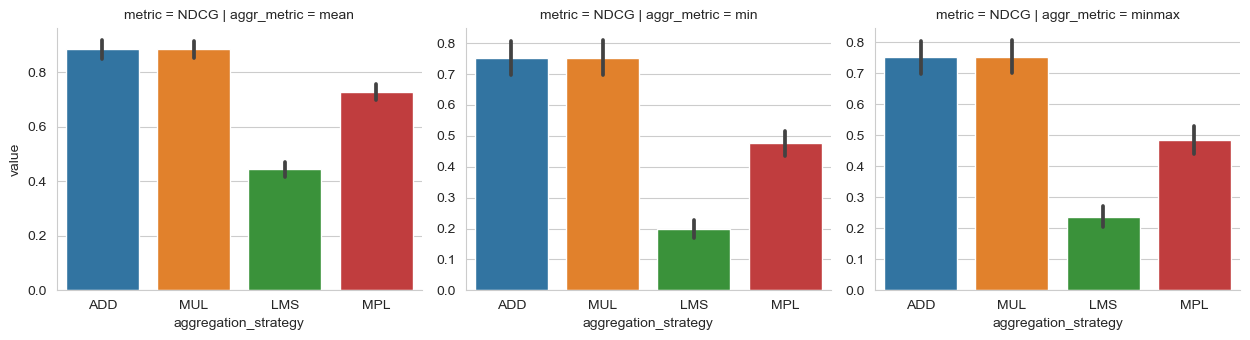

In [192]:
all_group_res = eval_df.groupby(['metric', 'aggr_metric', 'aggregation_strategy']).mean().reset_index()

g = sns.catplot(data=eval_df, row="metric", col="aggr_metric", 
                   x="aggregation_strategy", y="value", sharex=False, sharey=False,
                   kind="bar",  height=3.5, aspect=1.2)

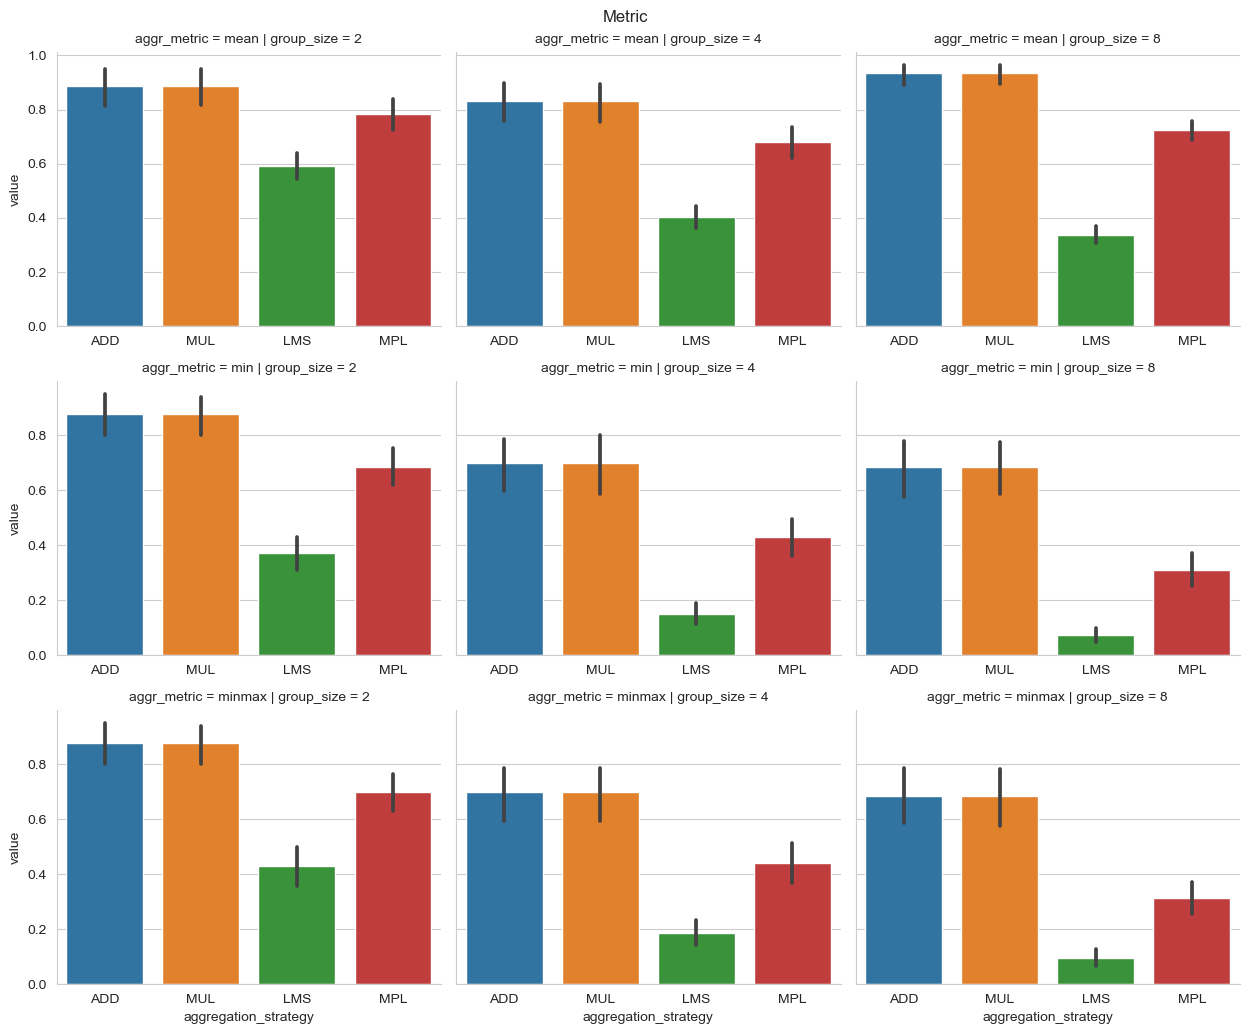

In [194]:
g = sns.catplot(data=eval_df_with_group_info, col="group_size", row="aggr_metric", 
                   x="aggregation_strategy", y="value", sharex=False, sharey="row",
                   kind="bar",  height=3.5, aspect=1.2)
plt.suptitle("Metric")
plt.tight_layout()

In [195]:
def evaluateGroupRecommendationPrecisionRecall(group_ground_truth, group_recommendation, group_members, binarize_feedback, binarize_feedback_positive_threshold):
    precision_list = []
    recall_list = []

    for user in group_members:
        user_ground_truth = group_ground_truth.loc[group_ground_truth['user'] == user]
        user_ground_truth.set_index("item", inplace=True)

        # Feedback binarization
        if binarize_feedback:
            user_ground_truth["final_rating"] = 0
            user_ground_truth.loc[user_ground_truth.rating >= binarize_feedback_positive_threshold, "final_rating"] = 1         
        else:
            user_ground_truth["final_rating"] = user_ground_truth["rating"]

        # Calculate Precision and Recall
        true_positives = np.sum((user_ground_truth["final_rating"] == 1) & (user_ground_truth.index.isin(group_recommendation)))
        predicted_positives = len(group_recommendation)
        actual_positives = np.sum(user_ground_truth["final_rating"] == 1)

        precision = true_positives / predicted_positives if predicted_positives > 0 else 0
        recall = true_positives / actual_positives if actual_positives > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)

    return [
        {
            "metric": "Precision",
            "aggr_metric": "mean",
            "value": np.mean(precision_list)
        },
        {
            "metric": "Precision",
            "aggr_metric": "min",
            "value": np.amin(precision_list)
        },
        {
            "metric": "Precision",
            "aggr_metric": "minmax",
            "value": np.amin(precision_list) / (np.amax(precision_list) if np.amax(precision_list) > 0 else 1)
        },
        {
            "metric": "Recall",
            "aggr_metric": "mean",
            "value": np.mean(recall_list)
        },
        {
            "metric": "Recall",
            "aggr_metric": "min",
            "value": np.amin(recall_list)
        },
        {
            "metric": "Recall",
            "aggr_metric": "minmax",
            "value": np.amin(recall_list) / (np.amax(recall_list) if np.amax(recall_list) > 0 else 1)
        }
    ]


In [196]:
# Evaluate recommendations for NDCG
ground_truth = extended_test_df
decoupled_results_ndcg = evaluate_group_recommendations_forall_groups(ground_truth, group_recommendations, group_dict)

# Evaluate recommendations for Precision and Recall
decoupled_results_precision_recall = []
for group_id in group_dict:
    group = group_dict[group_id]
    group_members = group['group_members']
    group_rec = group_recommendations[group_id]
    
    group_ground_truth = ground_truth.loc[ground_truth['user'].isin(group_members)]
    
    for aggregation_strategy in group_rec:
        agg_group_rec = group_rec[aggregation_strategy]
        agg_group_rec_eval = evaluateGroupRecommendationPrecisionRecall(group_ground_truth, agg_group_rec, group_members, binarize_feedback, binarize_feedback_positive_threshold)    

        for row in agg_group_rec_eval:
            row['aggregation_strategy'] = aggregation_strategy
            row['group_id'] = group_id

        decoupled_results_precision_recall += agg_group_rec_eval

# Create DataFrame for Precision and Recall results
eval_df_precision_recall = pd.DataFrame.from_records(decoupled_results_precision_recall)


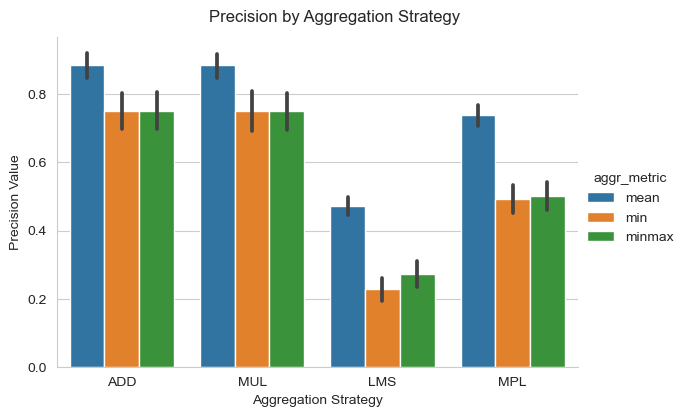

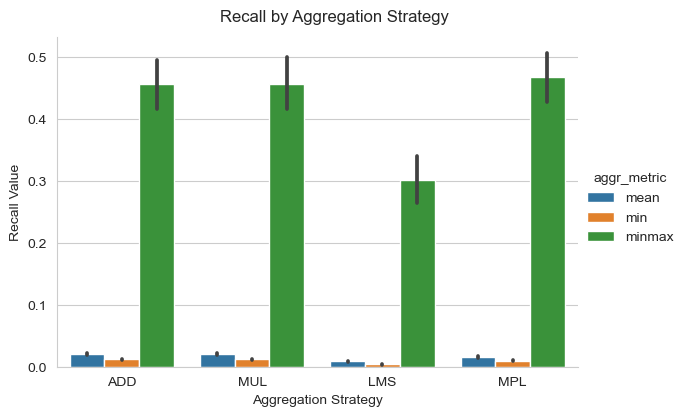

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Precision
g_precision = sns.catplot(data=eval_df_precision_recall[eval_df_precision_recall['metric'] == 'Precision'], 
                          x="aggregation_strategy", y="value", hue="aggr_metric",
                          kind="bar", height=4, aspect=1.5)
g_precision.set_axis_labels("Aggregation Strategy", "Precision Value")
g_precision.fig.suptitle("Precision by Aggregation Strategy", y=1.03)

# Plotting Recall
g_recall = sns.catplot(data=eval_df_precision_recall[eval_df_precision_recall['metric'] == 'Recall'], 
                       x="aggregation_strategy", y="value", hue="aggr_metric",
                       kind="bar", height=4, aspect=1.5)
g_recall.set_axis_labels("Aggregation Strategy", "Recall Value")
g_recall.fig.suptitle("Recall by Aggregation Strategy", y=1.03)

plt.show()
